In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append("/Users/pickle/Documents/GitHub/Diablo_2")
from beam import beam
import madx_utils.madx_utils as mxu
import optics_utils.transfer_matrices as opu

/Users/pickle/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
lattice_file = "lattice_example/optics_71.7_MeV.twiss"
df_optics = mxu.get_twiss(lattice_file)
df_optics[:10];

In [11]:
length_df = len(df_optics[:10])
new_df = df_optics[:10]
for index in np.arange(length_df):
    print(new_df.iloc[index]["KEYWORD"])

MARKER
DRIFT
INSTRUMENT
MONITOR
INSTRUMENT
DRIFT
INSTRUMENT
INSTRUMENT
DRIFT
INSTRUMENT


In [3]:
bm = beam.Beam()
bm.read_distribution("distribution_example/CCL_Output_71.7.dat")

beam created without any input beam distribution. Use read_distribution(filename) et voila
Hello
je suis la


'The beam distribution has been loaded successfully , You should check the distribution is correctly formatted into the dataframe - type thenameofyourobject.distribution'

In [39]:
df = bm.distribution[["X(mm)", "XP(mrad)"]]*0.001
new_df = np.transpose(df.to_numpy())
new_df

array([[ 2.990e-04, -2.000e-04,  2.660e-04, ...,  6.500e-05, -2.110e-04,
         5.890e-04],
       [-4.060e-04, -2.600e-05, -1.492e-03, ..., -4.990e-04,  1.106e-03,
        -8.190e-04]])

In [45]:
df[:2]

,X(mm),XP(mrad)
0,0.000299,-0.000406
1,-0.000200,-0.000026


In [58]:
-0.00020 - 0.1227*0.000026
nn = df["X(mm)"] + 0.1227*df["XP(mrad)"]

In [59]:
#(9758,2)
af = opu.md(0.1227).dot(new_df)
af

array([[ 2.491838e-04, -2.031902e-04,  8.293160e-05, ...,  3.772700e-06,
        -7.529380e-05,  4.885087e-04],
       [-4.060000e-04, -2.600000e-05, -1.492000e-03, ..., -4.990000e-04,
         1.106000e-03, -8.190000e-04]])

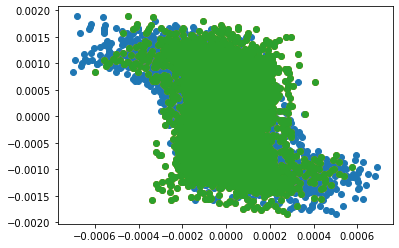

In [61]:
plt.scatter(df["X(mm)"], df["XP(mrad)"])
plt.scatter(nn, af[1])
plt.scatter(af[0], af[1])

In [47]:
df["XP(mrad)"] - af[1]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9753    0.0
9754    0.0
9755    0.0
9756    0.0
9757    0.0
Name: XP(mrad), Length: 9758, dtype: float64

In [48]:
df["X(mm)"]

0       0.000050
1       0.000003
2       0.000183
3      -0.000133
4      -0.000088
          ...   
9753   -0.000069
9754    0.000094
9755    0.000061
9756   -0.000136
9757    0.000100
Name: X(mm), Length: 9758, dtype: float64

In [57]:
nn

0       0.000336
1      -0.000225
2       0.000299
3      -0.000362
4      -0.000428
          ...   
9753   -0.000068
9754    0.000591
9755    0.000073
9756   -0.000237
9757    0.000661
Name: X(mm), Length: 9758, dtype: float64

In [64]:
opu.md(0.04).dot(opu.md(0.1227))

array([[1.    , 0.1627],
       [0.    , 1.    ]])

In [65]:
np.arange(1, 3)

array([1, 2])

In [67]:
nn=opu.md(0.1227)
nn

array([[1.    , 0.1227],
       [0.    , 1.    ]])

In [107]:
mm = opu.md(0.04).dot(opu.md(0.1227))
mm

array([[1.    , 0.1627],
       [0.    , 1.    ]])

In [112]:
tt = np.append(nn, mm, axis =0)
tt

array([[1.    , 0.1227],
       [0.    , 1.    ],
       [1.    , 0.1627],
       [0.    , 1.    ]])

In [104]:
nn

array([[1.    , 0.1227],
       [0.    , 1.    ]])

In [106]:
uu = opu.md(0.15).dot(opu.md(0.04)).dot(opu.md(0.1227))
uu

array([[1.    , 0.3127],
       [0.    , 1.    ]])

In [116]:
np.append(tt,uu, axis =0).reshape(3,2,2)

array([[[1.    , 0.1227],
        [0.    , 1.    ]],

       [[1.    , 0.1627],
        [0.    , 1.    ]],

       [[1.    , 0.3127],
        [0.    , 1.    ]]])

In [117]:
np.arange(0,3)

array([0, 1, 2])

In [121]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [4]:
nn = np.array([ opu.md(0.15) ])
nn

array([[[1.  , 0.15],
        [0.  , 1.  ]]])

In [5]:
nn.shape

(1, 2, 2)

In [16]:
def generate_dift(l):
    return opu.md(l)

In [ ]:
import random

In [37]:
length = [0.1, 0.34, 2.5, 0.04, 0.3]
m = len(length)

tm = np.zeros((m, 2, 2))
tm[0] = generate_dift(length[0])
for index in np.arange(m-1):
    print("iteration "+ str(index))
    mymat = opu.md(length[index+1])
    #print(mymat)
    tm[index + 1] = opu.md(length[index+1]).dot(tm[index])
    print(tm)
    

iteration 0
[[[1.   0.1 ]
  [0.   1.  ]]

 [[1.   0.44]
  [0.   1.  ]]

 [[0.   0.  ]
  [0.   0.  ]]

 [[0.   0.  ]
  [0.   0.  ]]

 [[0.   0.  ]
  [0.   0.  ]]]
iteration 1
[[[1.   0.1 ]
  [0.   1.  ]]

 [[1.   0.44]
  [0.   1.  ]]

 [[1.   2.94]
  [0.   1.  ]]

 [[0.   0.  ]
  [0.   0.  ]]

 [[0.   0.  ]
  [0.   0.  ]]]
iteration 2
[[[1.   0.1 ]
  [0.   1.  ]]

 [[1.   0.44]
  [0.   1.  ]]

 [[1.   2.94]
  [0.   1.  ]]

 [[1.   2.98]
  [0.   1.  ]]

 [[0.   0.  ]
  [0.   0.  ]]]
iteration 3
[[[1.   0.1 ]
  [0.   1.  ]]

 [[1.   0.44]
  [0.   1.  ]]

 [[1.   2.94]
  [0.   1.  ]]

 [[1.   2.98]
  [0.   1.  ]]

 [[1.   3.28]
  [0.   1.  ]]]


In [30]:
np.arange(m)

array([0, 1, 2, 3, 4])

In [31]:
tm [0]

array([[0., 0.],
       [0., 0.]])

In [39]:
0.1227+0.04+0.055+0.04+0.125+0.04

0.42269999999999996

In [40]:
0.1227+0.04

0.1627

In [41]:
0.1227+0.04+0.055

0.2177

In [42]:
0.1227+0.04+0.055+0.04

0.2577

In [43]:
0.1227+0.04+0.055+0.04+0.125

0.3827

In [44]:
np.arange(0,1)

array([0])